In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers.recurrent import GRU
from keras.layers import Flatten, Conv1D, MaxPool1D

In [29]:
# Load data dari device
data_bank = pd.read_csv("../Downloads/banking.csv")
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [30]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## 1. Data Deskriptif & Visualisasinya

In [31]:
# Menampilkan data deskriptif dalam DataFrame data_bank
data_bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [32]:
# Menampilkan data deskriptif untuk tipe kolom bertipe string/object
data_bank.describe(include = "O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


Karena pada data deskriptif tidak terlalu menarik untuk dilihat, maka kami akan membuatkan sebuah visualisasi untuk data deskriptif, seperti mean, median, standard deviasi, nilai maximum dan minimum.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom Previous'}, xlabel='previous', ylabel='Density'>

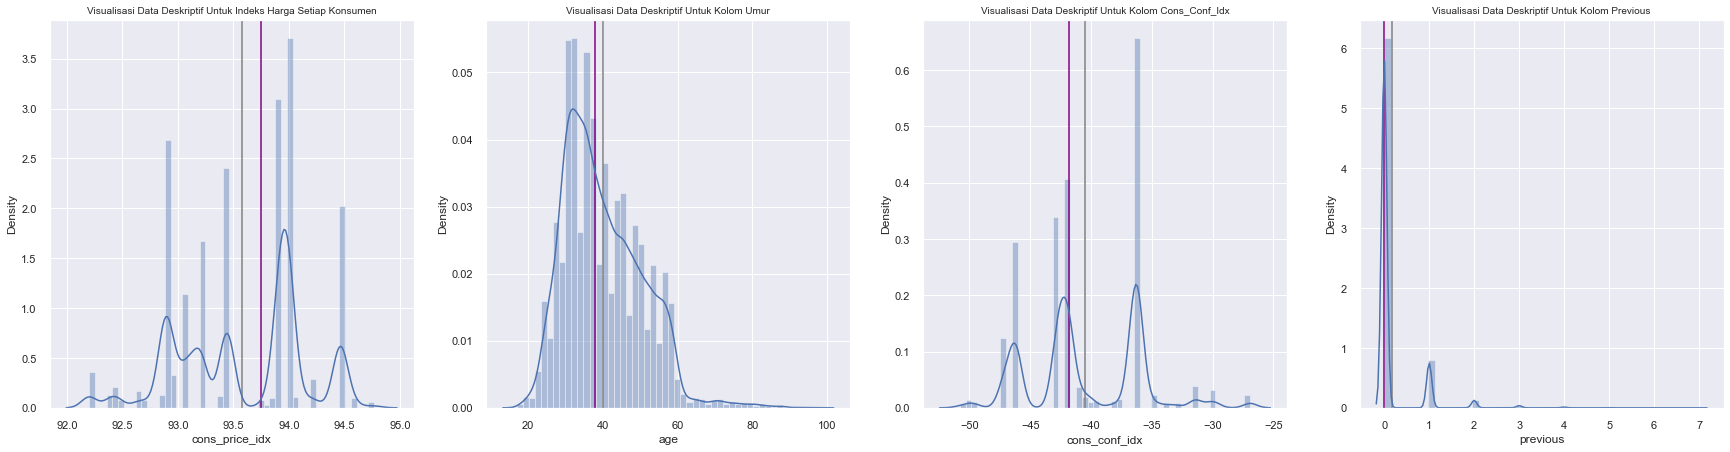

In [33]:
# Melakukan visualisasi data deskriptif (Mean & Median) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom indeks harga setiap konsumen
plt.subplot(6,4,1)
plt.axvline(data_bank["cons_price_idx"].mean(), color = "gray", label="mean")
plt.axvline(data_bank["cons_price_idx"].median(), color = "purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Indeks Harga Setiap Konsumen", fontsize=10)
sns.distplot(data_bank["cons_price_idx"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,2)
plt.axvline(data_bank["age"].mean(), color="gray", label="mean")
plt.axvline(data_bank["age"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Umur", fontsize=10)
sns.distplot(data_bank["age"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,3)
plt.axvline(data_bank["cons_conf_idx"].mean(), color="gray", label="mean")
plt.axvline(data_bank["cons_conf_idx"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Cons_Conf_Idx", fontsize=10)
sns.distplot(data_bank["cons_conf_idx"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,4)
plt.axvline(data_bank["previous"].mean(), color="gray", label="mean")
plt.axvline(data_bank["previous"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Previous", fontsize=10)
sns.distplot(data_bank["previous"])

Ket:
1. Terlihat pada kolom cons_price_idx mempunyai nilai rata2 dan median sama dengan ketika kami menggunakan sebuah fungsi .describe(), yaitu nilai rata2 berada di nilai 93.5 sedangkan nilai mediannya adalah 93.749.
2. Terlihat pada kolom age/umur dalam sebuah dataset bank marketing mempunyai nilai rata2 yaitu 40 tahun sedangkan pada nilai median mempunyai nilai yaitu sekitar umur 37 - 38 tahun.
3. Pada kolom consumer confidence index atau indeks kepercayaan konsumen bank memiliki selisih yang sangat tipis antara nilai rata2 dan median. Pada nilai rata2 terdapat -40.502600 sedangkan nilai median yaitu -41.800000.
4. Dan terakhir pada kolom previous, nilai rata2 adalah 0.172963 sedangkan nilai mediannya adalah 0.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom Emp_Var_Rate'}, xlabel='emp_var_rate', ylabel='Density'>

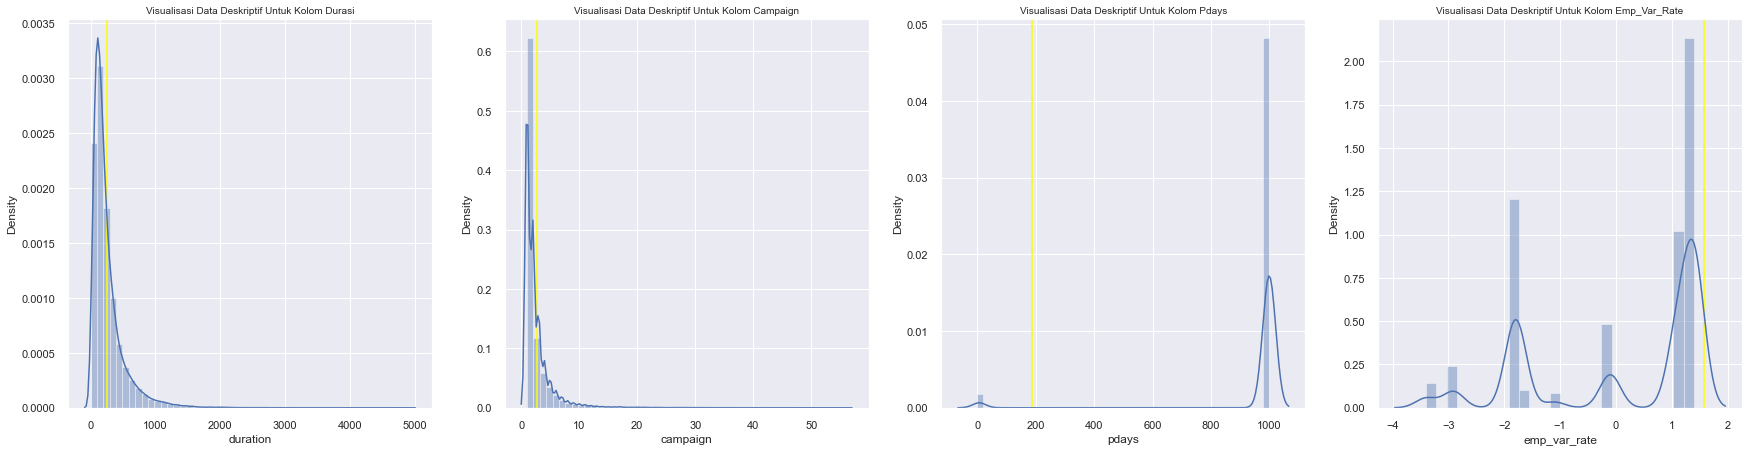

In [34]:
# Melakukan visualisasi data deskriptif (Standard Deviasi) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom duration
plt.subplot(6,4,1)
plt.axvline(data_bank["duration"].std(), color = "yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Durasi", fontsize=10)
sns.distplot(data_bank["duration"])

# Melakukan visualisasi data deskriptif untuk kolom campaign
plt.subplot(6,4,2)
plt.axvline(data_bank["campaign"].std(), label="std", color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Campaign", fontsize=10)
sns.distplot(data_bank["campaign"])

# Melakukan visualisasi data deskriptif untuk kolom pdays
plt.subplot(6,4,3)
plt.axvline(data_bank["pdays"].std(), color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Pdays", fontsize=10)
sns.distplot(data_bank["pdays"])

# Melakukan visualisasi data deskriptif untuk kolom emp_var_rate
plt.subplot(6,4,4)
plt.axvline(data_bank["emp_var_rate"].std(), color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Emp_Var_Rate", fontsize=10)
sns.distplot(data_bank["emp_var_rate"])

Ket:

1. Terlihat pada kolom duration mempunyai nilai standard deviasi adalah 259.279249.
2. Terlihat pada kolom campaign dalam sebuah dataset bank marketing mempunyai standard deviasi berada di sekitar nilai 2.
3. Pada kolom pdays memiliki nilai standard deviasi yaitu 186.910907.
4. Dan terakhir nilai standard deviasi pada kolom emp_var_rate adalah 1.570960.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom pdays'}, xlabel='pdays', ylabel='Density'>

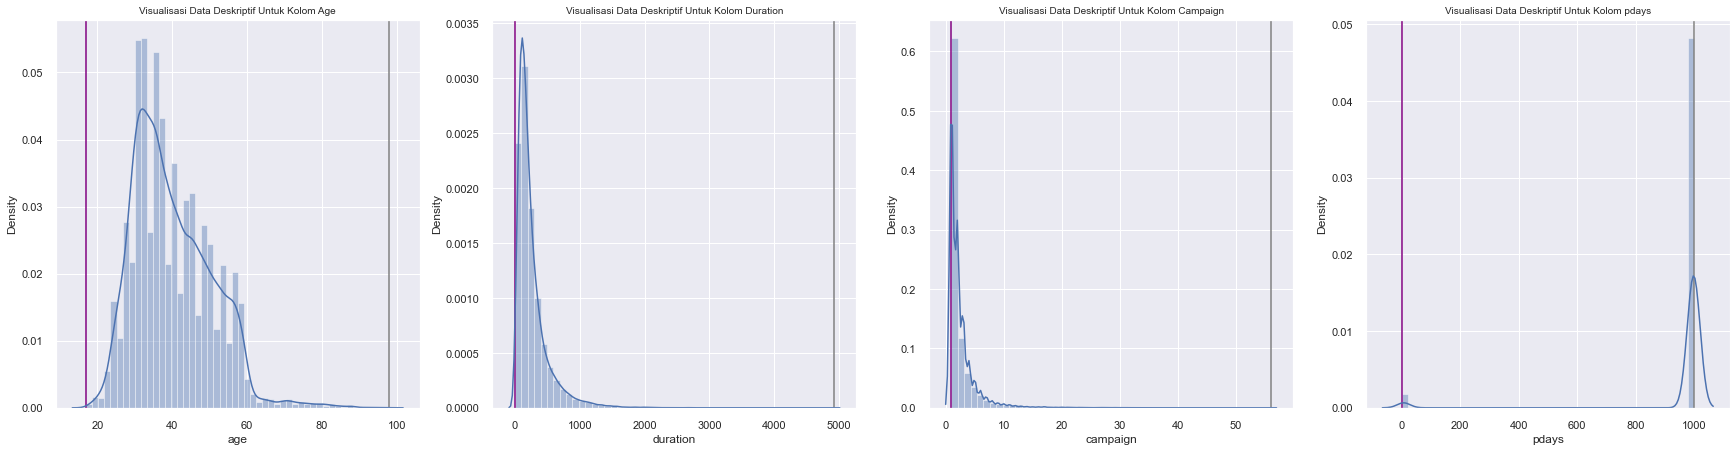

In [35]:
# Melakukan visualisasi data deskriptif (Max & Min) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom umur
plt.subplot(6,4,1)
plt.axvline(data_bank["age"].max(), color = "gray", label="mean")
plt.axvline(data_bank["age"].min(), color = "purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Age", fontsize=10)
sns.distplot(data_bank["age"])

# Melakukan visualisasi data deskriptif untuk kolom durasi
plt.subplot(6,4,2)
plt.axvline(data_bank["duration"].max(), color="gray", label="mean")
plt.axvline(data_bank["duration"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Duration", fontsize=10)
sns.distplot(data_bank["duration"])

# Melakukan visualisasi data deskriptif untuk kolom campaign
plt.subplot(6,4,3)
plt.axvline(data_bank["campaign"].max(), color="gray", label="mean")
plt.axvline(data_bank["campaign"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Campaign", fontsize=10)
sns.distplot(data_bank["campaign"])

# Melakukan visualisasi data deskriptif untuk kolom pdays
plt.subplot(6,4,4)
plt.axvline(data_bank["pdays"].max(), color="gray", label="mean")
plt.axvline(data_bank["pdays"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom pdays", fontsize=10)
sns.distplot(data_bank["pdays"])

## 2. Visualisasi Sebelum Pre-Processing

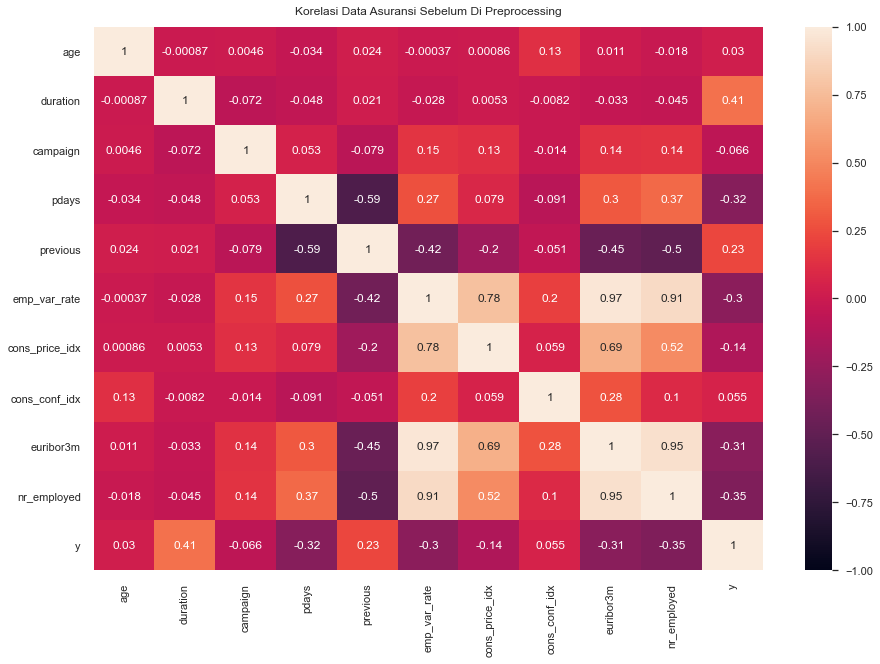

In [36]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(15, 10))

korelasi_data_bank= sns.heatmap(data_bank.corr(), vmin=-1, vmax=1, annot=True)
korelasi_data_bank.set_title("Korelasi Data Asuransi Sebelum Di Preprocessing", fontdict={"fontsize":12}, pad=12);

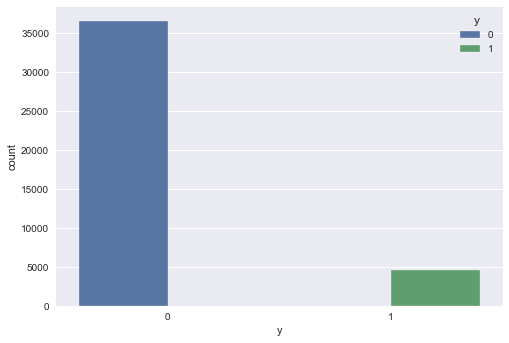

<Figure size 720x720 with 0 Axes>

In [37]:
# Melakukan visualisasi untuk kolom y

plt.style.use("seaborn") # Untuk menjadikan grafik matplotlib menggunakan style yang dimiliki oleh library seaborn
sns.countplot(x="y", hue="y", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

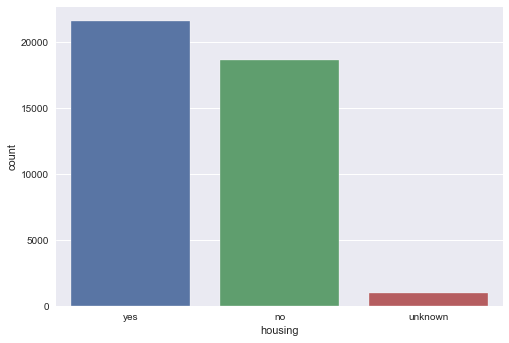

<Figure size 720x720 with 0 Axes>

In [38]:
# Melakukan visualisasi untuk kolom housing

sns.countplot(x="housing", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

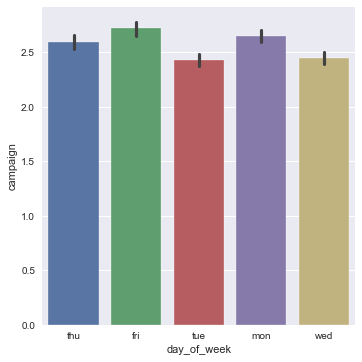

<Figure size 1800x1800 with 0 Axes>

In [39]:
# Melakukan visualisasi dari catplot untuk kolom day_of_week

sns.catplot(x="day_of_week", y="campaign", kind="bar", data=data_bank)
plt.figure(figsize=(25, 25))
plt.show()

<AxesSubplot:xlabel='month', ylabel='day_of_week'>

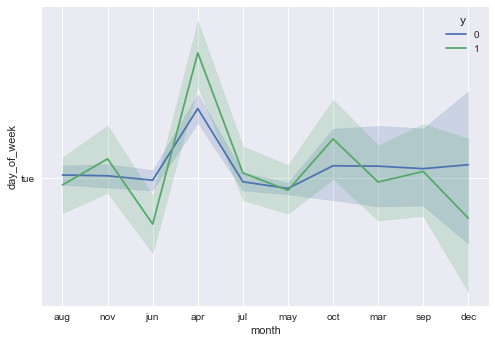

In [40]:
sns.lineplot(x="month", y="day_of_week",
             hue="y", data=data_bank)

## 3. Pre-Processing Data & Visualisasi

In [41]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [42]:
# Mengubah tipe data yang string menjadi int menggunakan LabelEncoder

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()   

data_bank['job']= le.fit_transform(data_bank['job']) 
data_bank['marital']= le.fit_transform(data_bank['marital'])
data_bank['education']= le.fit_transform(data_bank['education'])
data_bank['default']= le.fit_transform(data_bank['default'])
data_bank['housing']= le.fit_transform(data_bank['housing'])
data_bank['loan']= le.fit_transform(data_bank['loan'])
data_bank['contact']= le.fit_transform(data_bank['contact'])
data_bank['month']= le.fit_transform(data_bank['month'])
data_bank['day_of_week']= le.fit_transform(data_bank['day_of_week'])
data_bank['poutcome']= le.fit_transform(data_bank['poutcome'])

data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [43]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

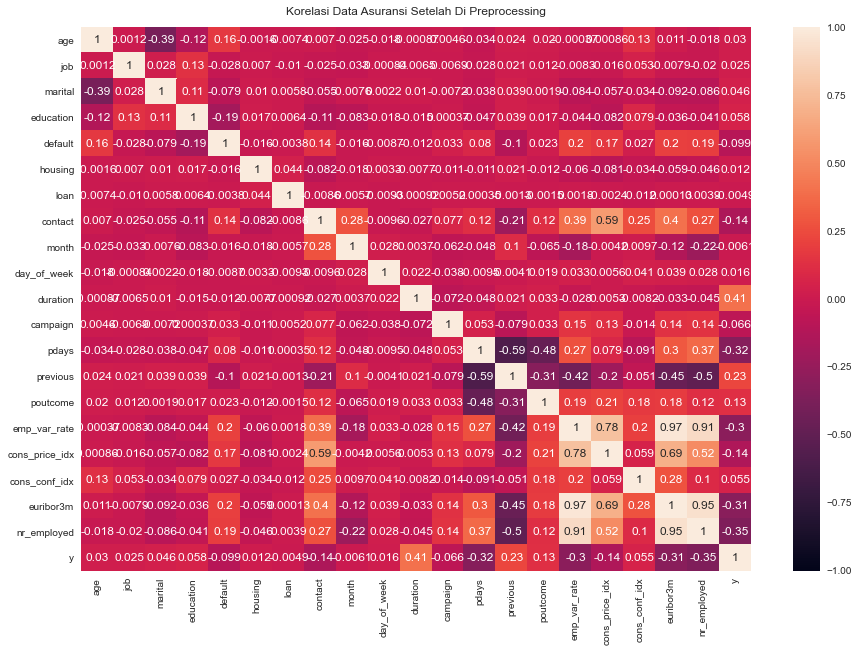

In [44]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(15, 10))

korelasi_data_bank= sns.heatmap(data_bank.corr(), vmin=-1, vmax=1, annot=True)
korelasi_data_bank.set_title("Korelasi Data Asuransi Setelah Di Preprocessing", fontdict={"fontsize":12}, pad=12);

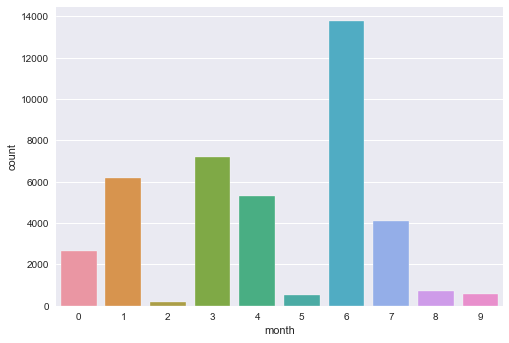

In [45]:
sns.countplot(x='month', data=data_bank)
sns.set(rc={'figure.figsize':(10, 8)})
plt.show()

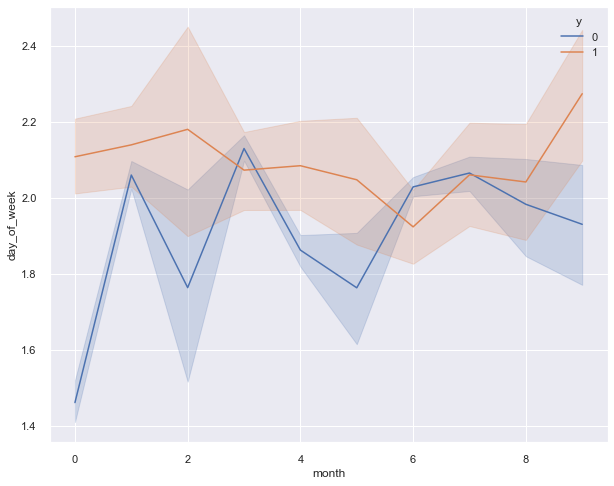

<Figure size 360x360 with 0 Axes>

In [46]:
# Membuat visualisasi time series berdasarkan Tanggal_Asuransi untuk kolom Gender dengan nilai hue=Target
sns.lineplot(data=data_bank, x="month", y="day_of_week", hue="y")
plt.figure(figsize=(5, 5))
plt.show()

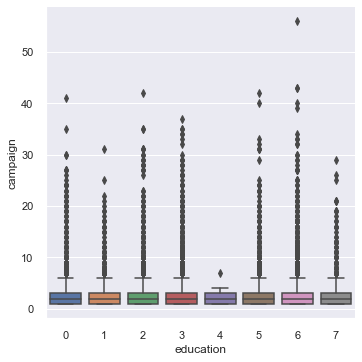

In [47]:
# Membuat visualisasi untuk kolom education
sns.catplot(x="education", y="campaign", kind="box", data=data_bank)

## 4. Mempersiapkan Data Train & Data Test

In [48]:
# Pemisahan data menjadi 2 variable

x = data_bank.drop(["y"], axis=1)

y = data_bank["y"]

In [49]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
len(x_train)

32950

In [51]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 4. Pemodelan dengan Machine Learning (SVM, Naive Bayes & Decision Tree)

In [52]:
# Pemanggilan model SVM terhadap variabel training

classifier = SVC(kernel="linear", random_state=1)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [53]:
# Pemanggilan model Naive Bayes terhadap variabel training

modelnb = GaussianNB()
modelnb.fit(x_train, y_train)

GaussianNB()

In [54]:
# Pemaggilan model decision tree terhadap variabel training

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
# Melakukan prediksi dari data testing yaitu x_test pada 3 model machine learning yang kami gunakan

y_pred_svm = classifier.predict(x_test)
print("Prediksi dari y_pred_svm adalah :", y_pred_svm)

y_pred_naive_bayes = modelnb.predict(x_test)
print("Prediksi dari y_pred_naive_bayes adalah :", y_pred_naive_bayes)

y_pred_decision_tree = decisiontree.predict(x_test)
print("Prediksi dari y_pred_decision_tree adalah :", y_pred_decision_tree)

Prediksi dari y_pred_svm adalah : [0 0 0 ... 0 0 0]
Prediksi dari y_pred_naive_bayes adalah : [0 0 0 ... 0 0 0]
Prediksi dari y_pred_decision_tree adalah : [0 0 0 ... 0 1 0]


In [68]:
# Melakukan pengukuran performa
from sklearn.metrics import confusion_matrix

print("------------------Performa SVM------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_svm).ravel()
print(tp, tn, fp, fn)

print("----------------Performa Naive Bayes-------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_naive_bayes).ravel()
print(tp, tn, fp, fn)

print("----------------Performa Decision Tree------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_decision_tree).ravel()
print(tp, tn, fp, fn)

------------------Performa SVM------------------------
7157 144 650 287
----------------Performa Naive Bayes-------------------
6450 851 375 562
----------------Performa Decision Tree----------------
6752 549 504 433


Ket:
- SVM
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7157.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 144.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 650.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 287. 


- Naive Bayes
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 6450.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 851.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 375.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 562.


- Decision Tree
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 6752.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 549.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 504.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 433. 

In [67]:
# Melihat tingkat akurasi, nilai recall, precision dan f1-score
from sklearn.metrics import classification_report

print("-----------------------SVM-------------------------------")
print(classification_report(y_test, y_pred_svm))

print("----------------------Naive Bayes-----------------------")
print(classification_report(y_test, y_pred_naive_bayes))

print("----------------------Decision Tree---------------------")
print(classification_report(y_test, y_pred_decision_tree))

-----------------------SVM-------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.67      0.31      0.42       937

    accuracy                           0.90      8238
   macro avg       0.79      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238

----------------------Naive Bayes-----------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7301
           1       0.40      0.60      0.48       937

    accuracy                           0.85      8238
   macro avg       0.67      0.74      0.70      8238
weighted avg       0.88      0.85      0.86      8238

----------------------Decision Tree---------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7301
           1       0.44      0.46      0.45       937

    accura

Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

## 5. Pemodelan Dengan Deep Learning (LSTM, RNN Layer GRU & CNN 1 Dimensi)

In [69]:
# Reshaping untuk variabel x_train dan x_test

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### LSTM

In [70]:
# Membuat jaringan syarat tiruan untuk model LSTM (Long Short Term Memory)
model = Sequential()
 
# Menambah layer LSTM yang pertama dan Dropout regularisation
model.add(LSTM(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang kedua dan Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang ketiga dan Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang keempat dan Dropout regularisation
model.add(LSTM(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan network LSTM kita
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 150)           91200     
_________________________________________________________________
dropout (Dropout)            (None, 20, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 100)           100400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 50)            30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 23)                6

In [71]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 350, validation_data=(x_test, y_test))

Epoch 1/20
95/95 [==============================] - 50s 410ms/step - loss: 0.0980 - accuracy: 0.8880 - val_loss: 0.0862 - val_accuracy: 0.8875
Epoch 2/20
95/95 [==============================] - 36s 375ms/step - loss: 0.0917 - accuracy: 0.8897 - val_loss: 0.0844 - val_accuracy: 0.8903
Epoch 3/20
95/95 [==============================] - 35s 368ms/step - loss: 0.0872 - accuracy: 0.8943 - val_loss: 0.0794 - val_accuracy: 0.8975
Epoch 4/20
95/95 [==============================] - 35s 373ms/step - loss: 0.0827 - accuracy: 0.8979 - val_loss: 0.0799 - val_accuracy: 0.8960
Epoch 5/20
95/95 [==============================] - 36s 384ms/step - loss: 0.0856 - accuracy: 0.8948 - val_loss: 0.0779 - val_accuracy: 0.8979
Epoch 6/20
95/95 [==============================] - 36s 382ms/step - loss: 0.0833 - accuracy: 0.8964 - val_loss: 0.0756 - val_accuracy: 0.9011
Epoch 7/20
95/95 [==============================] - 36s 380ms/step - loss: 0.0811 - accuracy: 0.8983 - val_loss: 0.0753 - val_accuracy: 0.9003

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di LSTM

In [83]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[ 0.01114297]
 [-0.0051169 ]
 [ 0.03475266]
 ...
 [ 0.00598023]
 [ 0.19493636]
 [-0.00698032]]
------------Prediksi dari variabel train-----------------
[[-0.00718932]
 [ 0.02228801]
 [ 0.04105913]
 ...
 [ 0.21226251]
 [ 0.00238392]
 [-0.00035733]]


In [84]:
# Pengukuran performa untuk variabel test dan train
from sklearn.metrics import confusion_matrix

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7225 76 695 242
------------------Performa Variabel Train------------------------
28935 312 2750 953


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7225.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 76.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 695.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 242.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28935.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 312.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2750.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 953.

In [85]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model LSTM
from sklearn.metrics import classification_report

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7301
           1       0.76      0.26      0.39       937

    accuracy                           0.91      8238
   macro avg       0.84      0.62      0.67      8238
weighted avg       0.90      0.91      0.89      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29247
           1       0.75      0.26      0.38      3703

    accuracy                           0.91     32950
   macro avg       0.83      0.62      0.67     32950
weighted avg       0.90      0.91      0.89     32950



#### Melihat Tingkat Akurasi Dari Kedua Data (Test & Train)

In [78]:
print("Tingkat Akurasi Data Train Di LSTM :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di LSTM :", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 15s 15ms/step - loss: 0.0638 - accuracy: 0.9071
Tingkat Akurasi Data Train Di LSTM : [0.06383209675550461, 0.9070712924003601]
258/258 [==============================] - 4s 14ms/step - loss: 0.0643 - accuracy: 0.9064
Tingkat Akurasi Data Test Di LSTM : [0.06426172703504562, 0.9064093232154846]


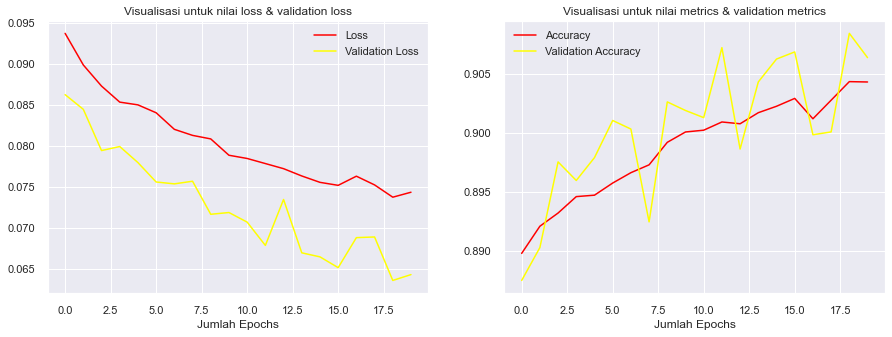

In [79]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

### RNN Dengan Layer GRU 

In [86]:
# Membuat jaringan syarat tiruan untuk model RNN dengan layer GRU
model = Sequential()
 
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(GRU(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(GRU(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan neural network pada model RNN
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 20, 150)           68850     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 150)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20, 100)           75600     
_________________________________________________________________
dropout_6 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 20, 50)            22800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 23)               

In [87]:
# Membuat model jaringan syaraf tiruan untuk model rnn dengan layer GRU 
history = model.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_data=(x_test, y_test))

Epoch 1/20
330/330 [==============================] - 45s 107ms/step - loss: 0.0924 - accuracy: 0.8917 - val_loss: 0.0827 - val_accuracy: 0.8889
Epoch 2/20
330/330 [==============================] - 33s 101ms/step - loss: 0.0851 - accuracy: 0.8946 - val_loss: 0.0744 - val_accuracy: 0.8989
Epoch 3/20
330/330 [==============================] - 34s 102ms/step - loss: 0.0836 - accuracy: 0.8935 - val_loss: 0.0737 - val_accuracy: 0.9000
Epoch 4/20
330/330 [==============================] - 34s 102ms/step - loss: 0.0808 - accuracy: 0.8981 - val_loss: 0.0717 - val_accuracy: 0.8965
Epoch 5/20
330/330 [==============================] - 34s 102ms/step - loss: 0.0800 - accuracy: 0.8987 - val_loss: 0.0713 - val_accuracy: 0.8985
Epoch 6/20
330/330 [==============================] - 34s 102ms/step - loss: 0.0787 - accuracy: 0.8993 - val_loss: 0.0668 - val_accuracy: 0.9052
Epoch 7/20
330/330 [==============================] - 34s 102ms/step - loss: 0.0774 - accuracy: 0.8985 - val_loss: 0.0657 - val_ac

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di RNN Layer GRU

In [88]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[-0.00735231]
 [-0.00537822]
 [ 0.02457522]
 ...
 [-0.00092597]
 [ 0.2831964 ]
 [-0.0075373 ]]
------------Prediksi dari variabel train-----------------
[[0.00664173]
 [0.03784514]
 [0.03695036]
 ...
 [0.44743404]
 [0.01263352]
 [0.0048136 ]]


In [89]:
# Pengukuran performa untuk variabel test dan train
from sklearn.metrics import confusion_matrix

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7240 61 728 209
------------------Performa Variabel Train------------------------
29059 188 2902 801


Ket:
- Variabel Test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7240.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 61.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 728.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 209.

- Variabel Train

1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 29059.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 188.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2902.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 801. 

In [90]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model LSTM
from sklearn.metrics import classification_report

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7301
           1       0.77      0.22      0.35       937

    accuracy                           0.90      8238
   macro avg       0.84      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29247
           1       0.81      0.22      0.34      3703

    accuracy                           0.91     32950
   macro avg       0.86      0.60      0.65     32950
weighted avg       0.90      0.91      0.88     32950



#### Melihat Tingkat Akurasi Dari Kedua Data (Train & Test)

In [91]:
print("Akurasi Data Train Di RNN:", model.evaluate(x_train, y_train))
print("Akurasi Data Test Di RNN:", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 13s 12ms/step - loss: 0.0604 - accuracy: 0.9062
Akurasi Data Train Di RNN: [0.06044375151395798, 0.9062215685844421]
258/258 [==============================] - 3s 13ms/step - loss: 0.0628 - accuracy: 0.9042
Akurasi Data Test Di RNN: [0.06277056038379669, 0.9042243361473083]


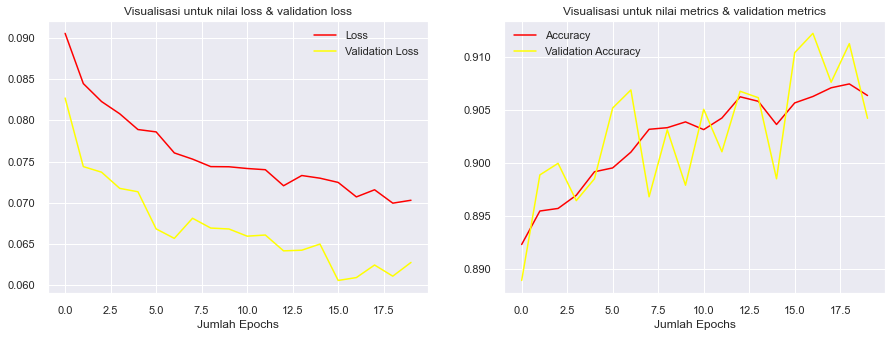

In [92]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

### CNN 1 Dimensi

In [93]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama dan Dropout regularisation
model.add(Conv1D(filters=150, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang kedua dan Dropout regularisation
model.add(Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang keempat dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))

# Melihat rancangan network CNN yang telah dibuat
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16, 150)           900       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 150)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 100)           75100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 50)             25050     
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 50)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 50)            

In [94]:
# Membuat model jaringan syaraf tiruan untuk model CNN
history = model.fit(x_train, y_train, epochs = 20, batch_size = 200, validation_data=(x_test, y_test))

Epoch 1/20
165/165 [==============================] - 10s 56ms/step - loss: 0.0779 - accuracy: 0.8981 - val_loss: 0.0648 - val_accuracy: 0.9060
Epoch 2/20
165/165 [==============================] - 10s 58ms/step - loss: 0.0689 - accuracy: 0.9006 - val_loss: 0.0627 - val_accuracy: 0.9087
Epoch 3/20
165/165 [==============================] - 9s 55ms/step - loss: 0.0674 - accuracy: 0.9031 - val_loss: 0.0633 - val_accuracy: 0.9069
Epoch 4/20
165/165 [==============================] - 9s 56ms/step - loss: 0.0654 - accuracy: 0.9056 - val_loss: 0.0631 - val_accuracy: 0.9046
Epoch 5/20
165/165 [==============================] - 9s 55ms/step - loss: 0.0641 - accuracy: 0.9062 - val_loss: 0.0610 - val_accuracy: 0.9114
Epoch 6/20
165/165 [==============================] - 9s 55ms/step - loss: 0.0623 - accuracy: 0.9112 - val_loss: 0.0629 - val_accuracy: 0.9017
Epoch 7/20
165/165 [==============================] - 10s 58ms/step - loss: 0.0627 - accuracy: 0.9091 - val_loss: 0.0603 - val_accuracy: 0.9

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di CNN 1 Dimensi

In [95]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[0.00865319]
 [0.01922362]
 [0.00688221]
 ...
 [0.00051247]
 [0.3097303 ]
 [0.01244663]]
------------Prediksi dari variabel train-----------------
[[ 0.00619066]
 [ 0.109499  ]
 [ 0.01208028]
 ...
 [ 0.5156985 ]
 [-0.01337871]
 [ 0.00621454]]


In [96]:
# Pengukuran performa untuk variabel test dan train
from sklearn.metrics import confusion_matrix

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7146 155 534 403
------------------Performa Variabel Train------------------------
28650 597 2065 1638


Ket:
- Variabel Test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7146.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 155.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 534.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 403.

- Variabel Train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28650.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 597.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2065.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 1638.

In [97]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model LSTM
from sklearn.metrics import classification_report

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7301
           1       0.72      0.43      0.54       937

    accuracy                           0.92      8238
   macro avg       0.83      0.70      0.75      8238
weighted avg       0.91      0.92      0.91      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     29247
           1       0.73      0.44      0.55      3703

    accuracy                           0.92     32950
   macro avg       0.83      0.71      0.75     32950
weighted avg       0.91      0.92      0.91     32950



### Melihat Tingkat Akurasi Dari Kedua Data (Train & Test)

In [98]:
print("Tingkat Akurasi Data Train Di CNN :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di CNN :", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 3s 3ms/step - loss: 0.0555 - accuracy: 0.9192
Tingkat Akurasi Data Train Di CNN : [0.05553349480032921, 0.9192109107971191]
258/258 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9164
Tingkat Akurasi Data Test Di CNN : [0.058566443622112274, 0.9163631796836853]


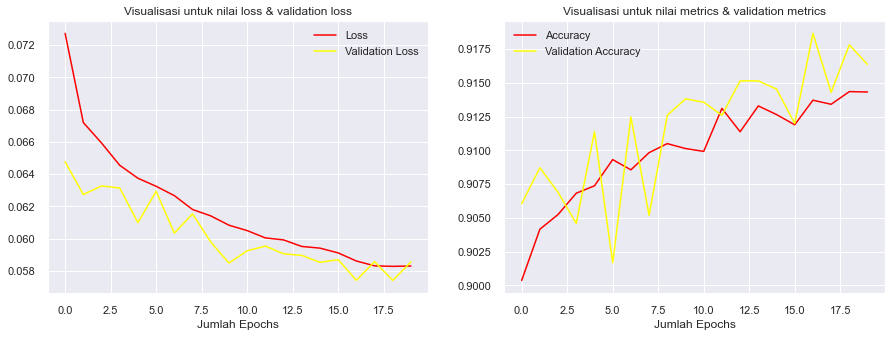

In [99]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();